<a href="https://colab.research.google.com/github/agustinparada/Fisica_Computacional_I/blob/master/Actividad7/Actividad7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Bibliotecas
import numpy as np
import scipy.linalg as la
from numpy.linalg import matrix_power as mpow
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Definimos un arreglo 1-D:
a=np.array([1,2,3,4,5,6,7])
print(a,'\n')

# Imprimimos ahora sus propiedades:
print('Número de dimensiones:', a.ndim)
print('Forma (shape):', a.shape)
print('Tamaño:', a.size)

[1 2 3 4 5 6 7] 

Número de dimensiones: 1
Forma (shape): (7,)
Tamaño: 7


In [4]:
# Definimos un arreglo de 2 dimensiones (2-D)
M=np.array([[1,2],[3,4],[5,6],[7,8],[9,10]])
print(M,'\n')

# Imprimamos sus propiedades:
print('Número de dimensiones:', M.ndim)
print('Forma (shape):', M.shape)
print('Tamaño:', M.size,'\n')


[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]] 

Número de dimensiones: 2
Forma (shape): (5, 2)
Tamaño: 10 



In [5]:
#Selección de una columna
col1=M[:,1]
print(col1,'\n')
print('Número de dimensiones:', col1.ndim)
print('Forma (shape):', col1.shape)
print('Tamaño:', col1.size,'\n')

[ 2  4  6  8 10] 

Número de dimensiones: 1
Forma (shape): (5,)
Tamaño: 5 



In [6]:
# Crearemos otro objeto distinto a partir de la columna anteriormente usada:
c=col1.reshape(5,1)
print(c,'\n')
print('Número de dimensiones:', c.ndim)
print('Forma (shape):', c.shape)
print('Tamaño:', c.size,'\n')

[[ 2]
 [ 4]
 [ 6]
 [ 8]
 [10]] 

Número de dimensiones: 2
Forma (shape): (5, 1)
Tamaño: 5 



***Operaciones y funciones matrix***

In [7]:
# Definimos m, n:
m=np.array([[1,2],[3,4]])
n=np.array([[5,6],[7,8]])
print('Suma de matrices:')
print(m+n,'\n')
print('Resta de matrices')
print(m-n,'\n')

print('Multiplicación matricial (término a término):')
print(m*n,'\n')
print('Producto matricial')
print(m@n)

Suma de matrices:
[[ 6  8]
 [10 12]] 

Resta de matrices
[[-4 -4]
 [-4 -4]] 

Multiplicación matricial (término a término):
[[ 5 12]
 [21 32]] 

Producto matricial
[[19 22]
 [43 50]]


# ***Ejercicio 1***
Sean las siguientes matrices:

$$ A=\begin{bmatrix}
1 & 3\\
-1 & 7 \end{bmatrix} $$

$$ B=\begin{bmatrix}
5 & 2\\
1 & 2 \end{bmatrix} $$

Y, tenemos a la matriz identidad:

$$ I=\begin{bmatrix}
1 & 0\\
0 & 1 \end{bmatrix} $$

Obtener: $2I+3A+AB$, lo que es:
$$ 2*I+3*A+A@B $$

In [8]:
# Definición de A y B:
a=np.array([[1,3],[-1,7]])
b=np.array([[5,2],[1,2]])
i=np.eye(2, dtype=int)

#Hacemos la operación
print('Cálculo del resultado de la operación:\n')
print(2*i+3*a+a@b,'\n')

Cálculo del resultado de la operación:

[[13 17]
 [-1 35]] 



In [9]:
# Comparamos utilizar mpow() y m@m:
print('"a" al cuadrado es:\n')
print(a@a)
print(mpow(a,2),'\n')
print('"b" a la quinta es:\n')
print(b@b@b@b@b)
print(mpow(b,5))

"a" al cuadrado es:

[[-2 24]
 [-8 46]]
[[-2 24]
 [-8 46]] 

"b" a la quinta es:

[[4597 2578]
 [1289  730]]
[[4597 2578]
 [1289  730]]


# ***Ejercicio 2: Teorema de Cayley - Hamilton***
Este teorema afirma que cualquier matriz $n\times n$ con determinante distinto de 0 ($\det{A}\neq 0$) satisface su polinomio característico en términos de $A$. Lo que es:

$$ p(A)=A^n +c_1A^{n-1}+\dots +\det{(A)}I_n =0$$

Donde $I_n$ es la matriz identidad $n\times n$. Este resultado es una consecuencia directa de la ecuación característica para obtener los eigenvectores y eigenvalores de una matriz. Ahora bien, presentamos el caso particular de las matrices $2\times 2$:

$$ P(A)=A^2-tr(A)A+\det{(A)}I_2=\begin{bmatrix}
0 & 0\\
0 & 0
\end{bmatrix} $$

Demostración para matrices $2\times 2$:

$P(A)$ la podemos representar, en general para $A=\begin{bmatrix}
a & b\\
c & d
\end{bmatrix}$ de la forma:

$$ \begin{bmatrix}
a & b\\
c & d
\end{bmatrix}^2-(a+d)\begin{bmatrix}
a & b\\
c & d
\end{bmatrix}+\begin{bmatrix}
ad-bc & 0\\
0 & ad-bc
\end{bmatrix} $$

Desarrollando:

$$ \begin{bmatrix}
a^2+bc & ab+bd\\
ac+dc & d^2+cb
\end{bmatrix} +\begin{bmatrix}
-a^2-ad & -ad-bd\\
-ac-dc & -d^2-ad
\end{bmatrix}+\begin{bmatrix}
ad-bc & 0\\
0 & ad-bc
\end{bmatrix}$$

De donde podemos ver que:

$$ p(A)=\begin{bmatrix}
0 & 0\\
0 & 0
\end{bmatrix} $$

Lo que concluye la demostración.

In [10]:
# Pongamos a prueba el teorema con unos ejemplos.
R1=[]
R2=[]
print('Leer las entradas de la matriz:\n')
for a in range(1,3):
 for b in range(1,3):
   if a==1:
     print('Escribe el elemento del renglón ',a,' de la columna ',b)
     R1.append(float(input()))
   elif a==2:
     print('Escribe el elemento del renglón ',a,' de la columna ',b)
     R2.append(float(input()))
A=np.array([R1,R2])
print('\n')
if la.det(A)!=0:
  pol=mpow(A,2) - np.trace(A)*A + la.det(A)*np.eye(2, dtype=int)
  print('El resultado de la operación con el polinomio resulta:\n')
  print(pol)
else:
  print('El determinante de la matriz escrita es iguala 0, por lo que no se cumplen las hipótesis del teorema. Intenta con otra matriz.')

Leer las entradas de la matriz:

Escribe el elemento del renglón  1  de la columna  1
1
Escribe el elemento del renglón  1  de la columna  2
-8
Escribe el elemento del renglón  2  de la columna  1
2
Escribe el elemento del renglón  2  de la columna  2
5


El resultado de la operación con el polinomio resulta:

[[0. 0.]
 [0. 0.]]


# ***Ejercicio 3: Resolución de sistemas de ecuaciones lineales***
Para ello, se utilizará el método de eliminación de Gauss - Jordan.

In [11]:
# Definimos las funciones necesarias (operaciones elementales: cambio de renglones, suma de múltiplo escalar entre renglones, múltiplo escalar de un renglón).
def camb_reng(A,i,j):
  E=np.eye(A.shape[0])
  E[i,i]=0
  E[j,j]=0
  E[i,j]=1
  E[j,i]=1
  return E@A

def multip_reng(A,k,i):
  E=np.eye(A.shape[0])
  E[i,i]=k
  return E@A

# Sumar k veces el renglón j al renglón i
def sum_mult_reng(A,k,j,i):   
  E=np.eye(A.shape[0])
  if i==j:
    E[i,i]=k+1
  else:
    E[i,j]=k
  return E@A

Resolveremos el sistema de ecuaciones:

$$ \begin{align*}
x-3y+z &=1\\
3x-4y+z &=5\\
2y-z &=0
\end{align*} $$

Primero mediante (como se mencionó anteriormente) el método de Gauss Jordan. Para ello, primero visualicemos el sistema de forma matricial:

$$ \begin{bmatrix}
1 & -3 & 1 \\
3 & -4 & 1\\
0 & 2 & -1
\end{bmatrix}\begin{bmatrix}
x \\
y \\
z
\end{bmatrix}=\begin{bmatrix}
1\\
5\\
0
\end{bmatrix} $$

La matriz aumentada es:

$$\begin{bmatrix}
1 & -3 & 1 & | & 1\\
3 & -4 & 1 & | & 5\\
0 & 2 & -1 & | & 0
\end{bmatrix}$$


In [12]:
A=np.array([[1,-3,1],[3,-4,1],[0,2,-1]])
b=np.array([1,5,0]).reshape(3,1)
M=A
M=np.hstack([M,b])
print(M,'\n')
# Sumamos al 2° renglón el 1° multiplicado por -3:
M=sum_mult_reng(M,-3,0,1)
print(M,'\n')
# Multiplicamos el segundo renglón por 1/5:
M=multip_reng(M,1/5,1)
print(M,'\n')
# Sumamos el 2° renglón multiplicado por -2 al tercero
M=sum_mult_reng(M,-2,1,2)
print(M,'\n')
# Sumamos el 2° renglón multiplicado por 3 al tercero
M=sum_mult_reng(M,3,1,0)
print(M,'\n')
# Multiplicamos el renglón 3 por -1/0.2:
M=multip_reng(M,-1/0.2,2)
print(M,'\n')
# SUmamos el 3° reglón multiplicado por 0.2 al primero
M=sum_mult_reng(M,0.2,2,0)
print(M,'\n')
# Sumamos el 3° renglón multiplicado por 0.4 al segundo
M=sum_mult_reng(M,0.4,2,1)
print(M,'\n')
print('Considerando que los números: ',M[0,2],' y ',M[1,2],' son prácticamente 0, entonces tenemos la solución del lado derecho de la matriz:' )
c=M[:,3].reshape(3,1)
print('La solución del sistema es x = \n',c)

# Resolvemos ahora con la función la.solve()
x=la.solve(A,b)
print('Con la función la.solve()\n')
print(x)

[[ 1 -3  1  1]
 [ 3 -4  1  5]
 [ 0  2 -1  0]] 

[[ 1. -3.  1.  1.]
 [ 0.  5. -2.  2.]
 [ 0.  2. -1.  0.]] 

[[ 1.  -3.   1.   1. ]
 [ 0.   1.  -0.4  0.4]
 [ 0.   2.  -1.   0. ]] 

[[ 1.  -3.   1.   1. ]
 [ 0.   1.  -0.4  0.4]
 [ 0.   0.  -0.2 -0.8]] 

[[ 1.   0.  -0.2  2.2]
 [ 0.   1.  -0.4  0.4]
 [ 0.   0.  -0.2 -0.8]] 

[[ 1.   0.  -0.2  2.2]
 [ 0.   1.  -0.4  0.4]
 [ 0.   0.   1.   4. ]] 

[[ 1.00000000e+00  0.00000000e+00 -9.99200722e-17  3.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00 -4.00000000e-01  4.00000000e-01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  4.00000000e+00]] 

[[ 1.00000000e+00  0.00000000e+00 -9.99200722e-17  3.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00 -8.88178420e-17  2.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  4.00000000e+00]] 

Considerando que los números:  -9.992007221626409e-17  y  -8.881784197001253e-17  son prácticamente 0, entonces tenemos la solución del lado derecho de la matriz:
La solución del sistema es x = 
 

  # ***Ejercicio 4: Eigenvalores y Eigenvectores***

  Sean las matrices:

  $$ B_1=\begin{bmatrix}
  2 & 0 & 0\\
  0 & 3 & 4\\
  0 & 4 & 9
  \end{bmatrix} $$

  $$ B_2=\begin{bmatrix}
  0 & 1 & 0\\
  0 & 0 & 1\\
  1 & 0 & 0
  \end{bmatrix} $$

  $$ B_3 = \begin{bmatrix}
  2 & 0 & 0 & 0\\
  1 & 2 & 0 & 0\\
  0 & 1 & 3 & 0\\
  0 & 0 & 1 & 3
  \end{bmatrix} $$

  Calcular sus eigenvalores y sus eigenvectores correspondientes y contrastar resultados con los ofrecidos en wikipedia.

In [13]:
# Sean las matrices:
B_1=np.array([[2,0,0],[0,3,4],[0,4,9]])
print(B_1,'\n')
B_2=np.array([[0,1,0],[0,0,1],[1,0,0]])
print(B_2,'\n')
B_3=np.array([[2,0,0,0],[1,2,0,0],[0,1,3,0],[0,0,1,3]])
print(B_3,'\n')
# Calculamos los eigenvectores y los eigen valores
eigval_1, eigvec_1=la.eig(B_1)
eig1=eigvec_1[:,0]
eig2=eigvec_1[:,1]
eig3=eigvec_1[:,2]

print('Resultados de B1: \n')
print('Eigenvalores: ',eigval_1,'\n')
print('Eigenvectores: ')
print(eig1,'\n' )
print(eig2,'\n' )
print(eig3,'\n' )

eigval_2, eigvec_2=la.eig(B_2)
eig1=eigvec_2[:,0]
eig2=eigvec_2[:,1]
eig3=eigvec_2[:,2]

print('Resultados de B2: \n')
print('Eigenvalores: ',eigval_2,'\n')
print('Eigenvectores: ')
print(eig1,'\n' )
print(eig2,'\n' )
print(eig3,'\n' )

eigval_3, eigvec_3=la.eig(B_3)
eig1=eigvec_3[:,0]
eig2=eigvec_3[:,1]
eig3=eigvec_3[:,2]

print('Resultados de B3: \n')
print('Eigenvalores: ',eigval_3,'\n')
print('Eigenvectores: ')
print(eig1,'\n' )
print(eig2,'\n' )
print(eig3,'\n' )

[[2 0 0]
 [0 3 4]
 [0 4 9]] 

[[0 1 0]
 [0 0 1]
 [1 0 0]] 

[[2 0 0 0]
 [1 2 0 0]
 [0 1 3 0]
 [0 0 1 3]] 

Resultados de B1: 

Eigenvalores:  [11.+0.j  1.+0.j  2.+0.j] 

Eigenvectores: 
[0.         0.4472136  0.89442719] 

[ 0.          0.89442719 -0.4472136 ] 

[1. 0. 0.] 

Resultados de B2: 

Eigenvalores:  [-0.5+0.8660254j -0.5-0.8660254j  1. +0.j       ] 

Eigenvectores: 
[ 0.57735027+0.j  -0.28867513+0.5j -0.28867513-0.5j] 

[ 0.57735027-0.j  -0.28867513-0.5j -0.28867513+0.5j] 

[-0.57735027+0.j -0.57735027+0.j -0.57735027+0.j] 

Resultados de B3: 

Eigenvalores:  [3.+0.j 3.+0.j 2.+0.j 2.+0.j] 

Eigenvectores: 
[0. 0. 0. 1.] 

[ 0.00000000e+00  0.00000000e+00  6.66133815e-16 -1.00000000e+00] 

[ 0.          0.57735027 -0.57735027  0.57735027] 



***Comparación con los valores de wikipedia***

Los eigenvectores obtenidos no coinciden por completo con los resultados dados por la wikipedia. Esto se debe a que, gracias a la propiedad de los determinantes de cambiar de signo cuando se cambian sus renglones. 

Sin embargo, se mantienen las relaciones entre los números (doble de las constantes arbitrarias) y cantidad de ceros.

# ***Ejercicios 5: Interpolación***

Interpolar un polinomio de grado 8 a los puntos $(x, y)$:

$$ (0.0, 0.0) $$

$$ (0.5, 0.47942) $$

$$ (1.0, 0.84147) $$

$$ (1.5, 0.99749) $$

$$ (2.0, 0.90930) $$

$$ (2.5, 0.59847) $$

$$ (3.0, 0.14112) $$

$$ (3.5, -0.35078) $$

[]


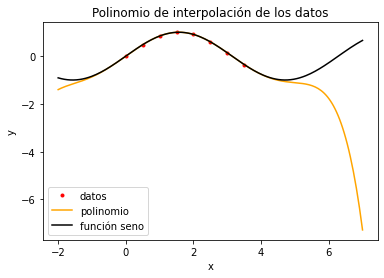

In [14]:
# Interpolación de 8 puntos.
n=9
x=np.array([0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5]).reshape(8,1)

y=np.array([0.0,0.47942,0.84147,0.99749,0.90930,0.59847,0.14112,-0.35078]).reshape(8,1)

X = np.column_stack([x**k for k in range(0,n-1)])

print(X[:0,:])

a=la.solve(X,y)
a.shape

xpol=np.linspace(-2,7,200)
ypol=sum([a[k]*xpol**k for k in range(0,n-1)])
ysin=np.sin(xpol)

plt.plot(x,y,'r.',label='datos')
plt.plot(xpol,ypol,'orange', label='polinomio')
plt.plot(xpol,ysin,'black',label='función seno')
plt.title('Polinomio de interpolación de los datos')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


# ***Ejercicio 6: Regresión lineal***

Se llevará a cabo la regresión lineal de los datos de tendencia de temperaturasmáximas y mínimas de la Ciudad Lerdo, Durango. Estos datos de tendencia surgieron de la descomposición estacionaria de los valores de las temperaturas a lo largo del periodo de tiempo comprendido entre 1990 hasta 2002.

Importamos los datos de la actividad 5, de la descomposición: Tendencia + Destacionalidad + Residuo, por medio de archivos **csv** subidos a la arpeta de la actividad en *github*.

In [30]:
# Leemos y adecuamos los datos de tendencia de la tendencia de temperaturas máximas y mínimas.

url1='https://raw.githubusercontent.com/agustinparada/Fisica_Computacional_I/master/Actividad7/trendmax.csv'
url2='https://raw.githubusercontent.com/agustinparada/Fisica_Computacional_I/master/Actividad7/trendtmin.csv'

trTmax=pd.read_csv(url1, sep=',',encoding='cp1251', engine='python')
trTmin=pd.read_csv(url2, sep=',', encoding='cp1251', engine='python')

trTmax['fecha']=pd.to_datetime(trTmax['fecha']).copy()
trTmin['fecha']=pd.to_datetime(trTmin['fecha']).copy()

trTmax=trTmax.set_index('fecha')
trTmin=trTmin.set_index('fecha')

trTmax['fec_dec']=trTmax.index.year+(trTmax.index.dayofyear)/365
trTmin['fec_dec']=trTmin.index.year+(trTmin.index.dayofyear)/365

ar_trTmax=np.array([trTmax['Tmax']])
ar_trTmin=np.array([trTmin['Tmin']])

ar_trTmax=ar_trTmax.reshape(4205,1)
ar_trTmin=ar_trTmin.reshape(4205,1)

ar_trTmax_date=np.array([trTmax['fec_dec']]).reshape(4205,1)
ar_trTmin_date=np.array([trTmin['fec_dec']]).reshape(4205,1)

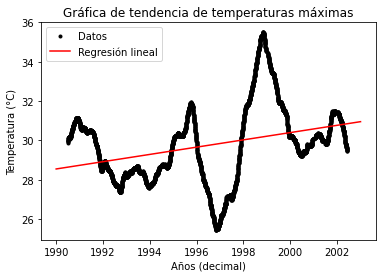

La pendiente de la recta de regresión de los datos es:
 [0.1849928]


In [28]:
# Aplicamos regresión lineal para los datos de tendencia de temperatura máxima y graficamos.
unos_4205=np.array([1 for a in range(1,4206)]).reshape(4205,1)
X=np.hstack([unos_4205,ar_trTmax_date])
a=la.solve(X.T @ X, X.T @ ar_trTmax)

xs=np.linspace(1990,2003,6000)
ys=a[0]+a[1]*xs

plt.plot(ar_trTmax_date, ar_trTmax, 'k.', label='Datos')
plt.plot(xs, ys, 'red', label='Regresión lineal')
plt.title('Gráfica de tendencia de temperaturas máximas')
plt.xlabel('Años (decimal)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

print('La pendiente de la recta de regresión de los datos es:\n', a[1])

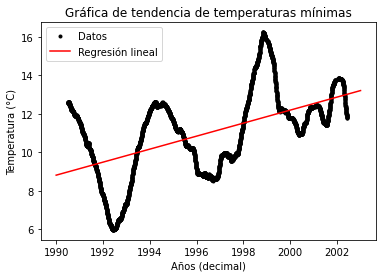

La pendiente de la recta de regresión de los datos:
 [0.33826361]


In [29]:
# Aplicamos regresión lineal para los datos de tendencia de temperatura mínima y graficamos.
X1=np.hstack([unos_4205,ar_trTmin_date])
a1=la.solve(X1.T @ X1, X1.T @ ar_trTmin)

xs=np.linspace(1990,2003,6000)
ys=a1[0]+a1[1]*xs

plt.plot(ar_trTmin_date, ar_trTmin, 'k.', label='Datos')
plt.plot(xs, ys, 'red', label='Regresión lineal')
plt.title('Gráfica de tendencia de temperaturas mínimas')
plt.xlabel('Años (decimal)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

print('La pendiente de la recta de regresión de los datos:\n',a1[1])

***Breve análisis***

De los valores de las pendientes, podemos conocer que ambas temperaturas poseen una tendencia de aumento.